Analyzing Popular Data Science Questions in Data Science Stack Exchange
===

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! Today we will focus on its data science part and analyze the questions.

In this website, developers and data scientists ask questions about their code or about a small part of their projects that they work on. These questions usually about a problem that the developer can't figure out or confused so he/she needs someone's help or opinion to move forward.

This website is very helpful as it can help us solve our problems as there might be many developers that faced the same or very similar problem with us. We can filter the questions with tags, these tags are keywords that help us to find what kind of questions we are looking for.

Stack Exchange provides a public database for each of its websites where we can run SQL queries and get results about the database. Posts, tags, comments tables look more promising towards finding the most popular content.

Stack Exchange Data Explorer
---

Now, let's begin our analysis!
First, we will check out how many types of posts there are by running the query below in the database.

```
SELECT pt.Name as TypeName, p.PostTypeId, COUNT(*) as NrOfPosts
FROM Posts p
LEFT JOIN PostTypes pt
ON p.PostTypeId=pt.Id
GROUP BY pt.Name, p.PostTypeId
ORDER BY NrOfPosts DESC;
```

|TypeName | PostTypeId | NrOfPosts |
|--- | --- | --- |
|Answer | 2 | 29784 | 
|Question | 1 | 26240 |
|TagWiki | 5 | 247 |
|TagWikiExcerpt | 4 | 247 |
|ModeratorNomination | 6 | 11 |
|WikiPlaceholder | 7 | 1 |

We can see that the most common post types are answer and question.

Next, we will run a query against the database that extracts the columns listed above for all the questions in 2019.

```
SELECT TOP 5 Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount 
FROM posts
WHERE PostTypeId = 1 AND YEAR(CreationDate)=2019;
```

|Id|PostTypeId|CreationDate|ScoreView|Count|Tags|AnswerCount|FavoriteCount|
|---|---|---|---|---|---|---|---|
|63842|1|2019-11-27 11:07:59|3|65|predictive-modelingmulticlass-classificationclass-imbalanceperformancesampling|2||
|63843|1|2019-11-27 11:13:52|0|24|lstmdata-science-model|0||
|63845|1|2019-11-27 11:22:08|0|47|tensorflow|0||
|63848|1|2019-11-27 11:59:15|0|77|deep-learningkeraslstmdeep-network|1||
|63855|1|2019-11-27 12:54:54|3|532|machine-learningdatasetkagglegoogle|0|1|

For simplicity, we limited our table with only 5 rows.

We can see that the 'FavoriteCount' column has some missing values!

Getting and Exploring the Data
---

The result of the query was stored in a file called '2019_questions.csv' so we are going to read it into a pandas dataframe and explore it.

In [1]:
import pandas as pd
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [3]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [6]:
questions.shape

(8839, 7)

Cleaning the Data
---

In [4]:
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

It looks like 'FavoriteCount' column has 7432 rows of null values out of 8839 rows! That is a huge ratio of missing values. Moreover, 'Tags' column also needs some cleaning as we can't read it properly.

Let's fill in the missing values in 'FavoriteCount'.

In [9]:
questions.fillna(value={"FavoriteCount":0}, inplace=True)

In [10]:
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

Next, we will clean the 'Tags' column.

In [22]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


Most Used and Most Viewed
---

We will find how many times each tag was used.

In [72]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [73]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "UseCount"}, inplace=True)

In [74]:
tag_count

,UseCount
matplotlib,77
cnn,489
impala,1
r,268
hyperparameter-tuning,59
object-recognition,14
nlp,493
definitions,4
ai,25
estimators,8


Let's create a visualizaton of the above results.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

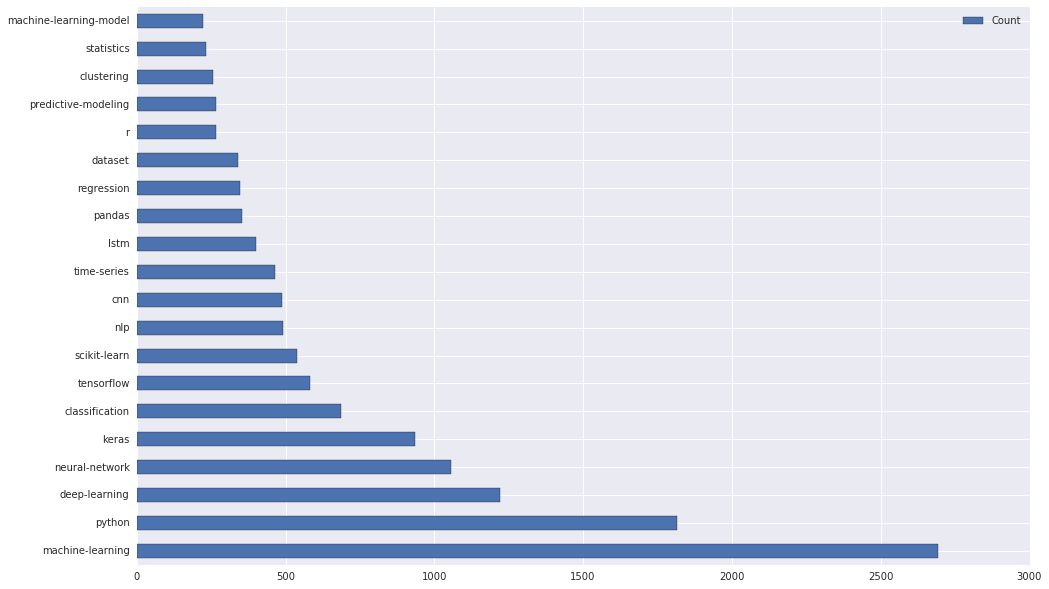

In [61]:
tag_count.sort_values(by="Count", ascending=False).head(20).plot(kind="barh", figsize=(16,10));

Next, we will count how many times each tag was viewed.

In [69]:
tag_views = dict()

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_views:
            tag_views[tag] += row["ViewCount"]
        else:
            tag_views[tag] = row["ViewCount"]

In [70]:
tag_views = pd.DataFrame.from_dict(tag_views, orient="index")
tag_views.rename(columns={0:"ViewCount"}, inplace=True)

In [71]:
tag_views

,ViewCount
matplotlib,25968
cnn,70349
impala,19
r,33684
hyperparameter-tuning,6911
object-recognition,2157
nlp,71382
definitions,155
ai,3432
estimators,289


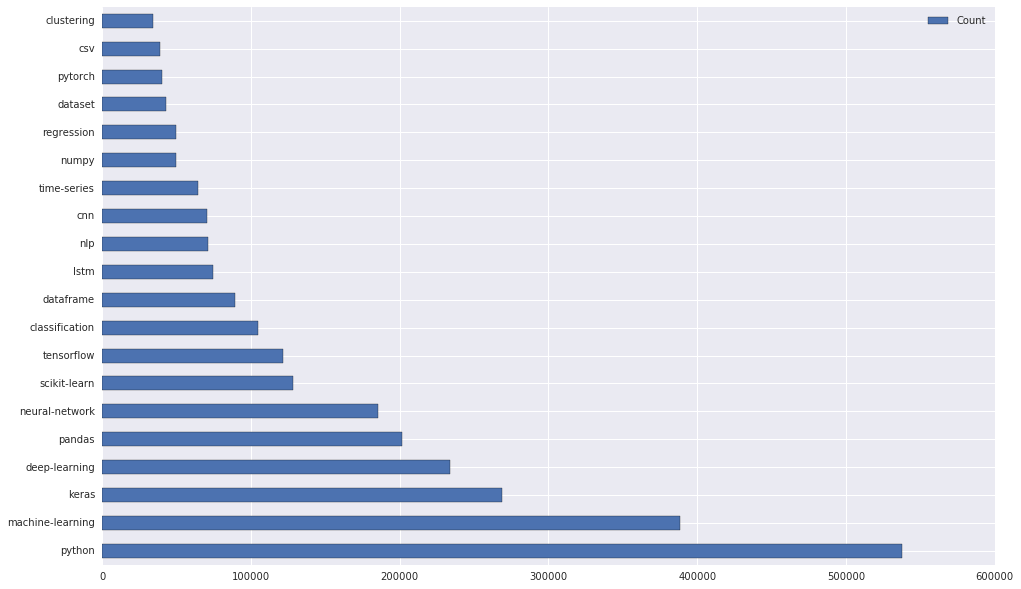

In [58]:
tag_views.sort_values(by="Count", ascending=False).head(20).plot(kind="barh", figsize=(16,10));

In [59]:
most_used = tag_count.sort_values(by="Count", ascending=False).head(20)
most_viewed = tag_views.sort_values(by="Count", ascending=False).head(20)

In [79]:
tags_used_viewed= pd.merge(most_used, most_viewed, how="outer", left_index=True, right_index=True, suffixes=("Used","Viewed"))

In [80]:
tags_used_viewed

,CountUsed,CountViewed
classification,685.0,104457.0
clustering,257.0,33928.0
cnn,489.0,70349.0
csv,NaN,38654.0
dataframe,NaN,89352.0
dataset,340.0,43151.0
deep-learning,1220.0,233628.0
keras,935.0,268608.0
lstm,402.0,74458.0
machine-learning,2693.0,388499.0


The tags present in most_used and not present in most_viewed are:

* machine-learning-model
* statistics
* predictive-modeling
* r

And the tags present in most_viewed but not in most_used are:

* csv
* pytorch
* dataframe

Relations Between Tags
----

Let's see how these tags are related to each other.

In [93]:
all_tags = list(tag_count.index)

In [94]:
relations = pd.DataFrame(index=all_tags, columns=all_tags)
relations.fillna(0, inplace=True)
relations.head()

,matplotlib,cnn,impala,r,hyperparameter-tuning,object-recognition,nlp,definitions,ai,estimators,...,parameter-estimation,normal-equation,class-imbalance,encoding,education,gaussian-process,data-analysis,nlg,activity-recognition,vae
matplotlib,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cnn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
impala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
r,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hyperparameter-tuning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We created an empty dataframe with all tags. We will fill it with 'most_used' values.

In [95]:
for tags in questions["Tags"]:
    relations.loc[tags,tags] +=1

In [97]:
relations_most_used = relations.loc[most_used.index, most_used.index]

In [98]:
relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The dataframe above is not very readable, let's turn it into a heatmap.

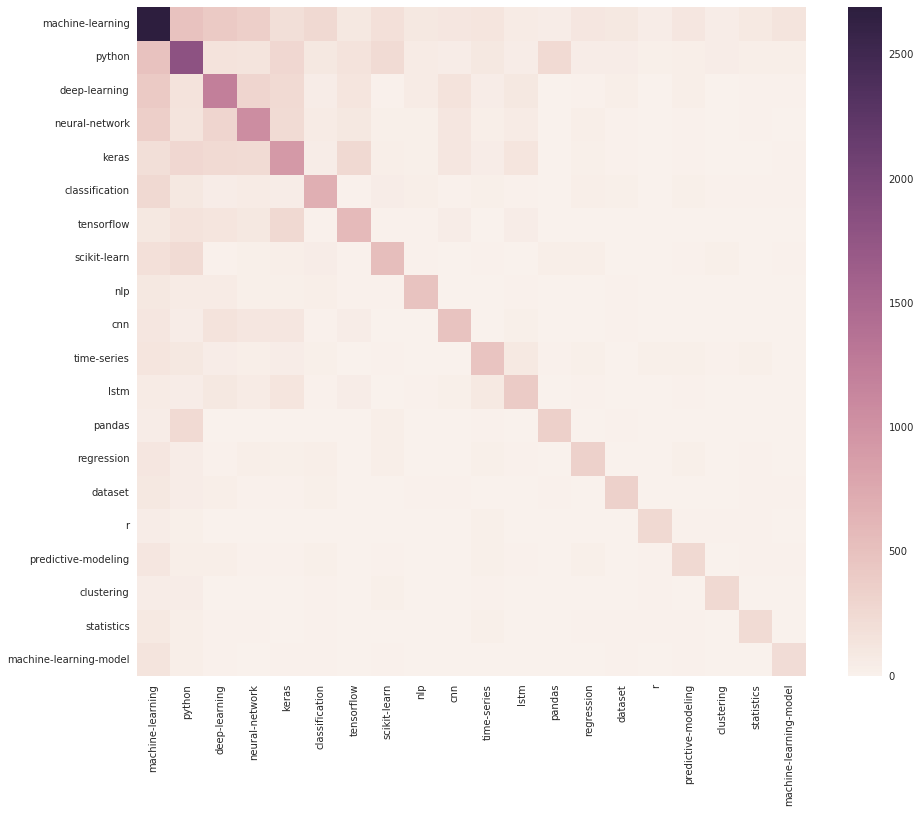

In [111]:
plt.figure(figsize=(15,12))
sns.heatmap(relations_most_used, annot=False);

It looks like machine learning, python, deep learning and neural network tags are more related to each other than other tags.

Is deep learning just a fad?
---

Could interest in deep learning be slowing down? This time, we will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [116]:
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [117]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [118]:
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


First, we should identify deep learning tags, which are ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [119]:
deep_list = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def deep(tags):
    for tag in tags:
        if tag in deep_list:
            return 1
        else:
            return 0

In [120]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(deep)

In [121]:
all_questions.head(10)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",0
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


We don't have enough data for 2020, so we will eliminate that year in our analysis.

In [131]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

In [132]:
all_questions["year"] = all_questions["CreationDate"].dt.year

In [133]:
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,year
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,2019
1,45418,2019-02-12 00:50:39,[neural-network],1,2019
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019
3,45426,2019-02-12 04:51:49,[keras],1,2019
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019


In [134]:
all_questions.shape

(21117, 5)

Let's separate the deep learning questions into another dataframe.

In [135]:
deep_questions = all_questions[all_questions["DeepLearning"] == 1].copy()

In [136]:
deep_questions.head()

,Id,CreationDate,Tags,DeepLearning,year
1,45418,2019-02-12 00:50:39,[neural-network],1,2019
3,45426,2019-02-12 04:51:49,[keras],1,2019
5,45428,2019-02-12 05:43:18,[cnn],1,2019
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,2019
18,45451,2019-02-12 14:33:37,[keras],1,2019


Let's see how many deep learning questions asked in total and also per time period.

In [143]:
deep_questions.shape[0]

3651

In [144]:
deep_questions["year"].value_counts().sort_index()

2014      11
2015      43
2016     228
2017     472
2018    1063
2019    1834
Name: year, dtype: int64

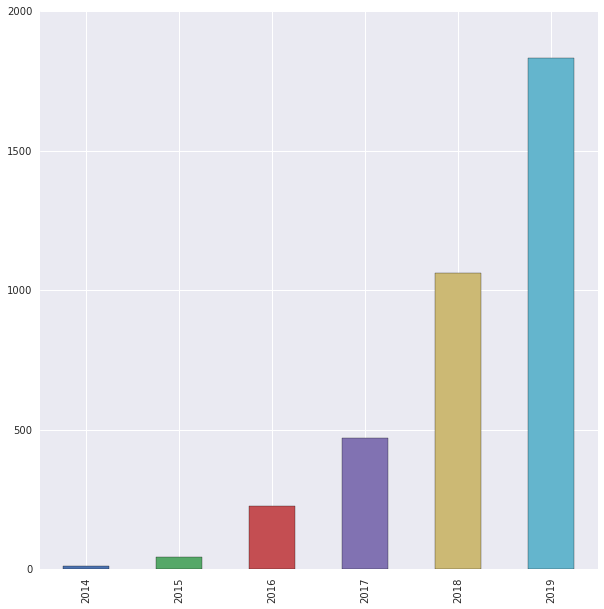

In [142]:
deep_questions["year"].value_counts().sort_index().plot.bar(figsize=(10,10));

As we can see from the above graph, the number of deep learning questions increased in time. However, this graph is not enough for us. Let's see the increase quarterly, and also we should compare the number of deep learning questions with the number of all questions.

In [150]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [151]:
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,year,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,2019,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019,19Q1


In [168]:
quarterly = all_questions.groupby("Quarter").agg({"DeepLearning":["sum","size"]})
quarterly.columns=["DeepLearningQuestions", "TotalQuestions"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)

In [169]:
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,3,157,0.019108
1,14Q3,4,189,0.021164
2,14Q4,4,216,0.018519
3,15Q1,5,190,0.026316
4,15Q2,6,284,0.021127
5,15Q3,13,311,0.041801
6,15Q4,19,382,0.049738
7,16Q1,38,516,0.073643
8,16Q2,45,518,0.086873
9,16Q3,69,585,0.117949


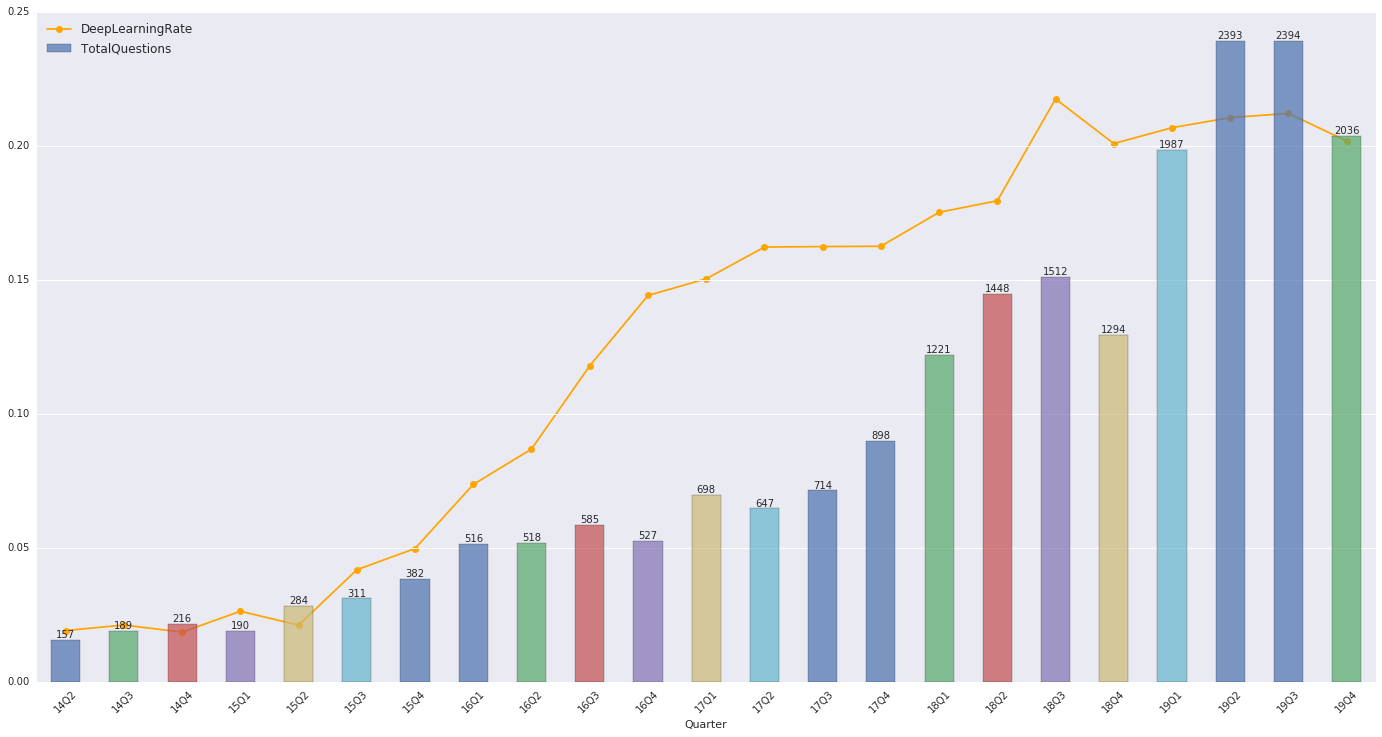

In [170]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It looks like deep learning popularity has increased over time and there is no evidence for a decline. We can't say that it is a fad, it keeps its popularity.